**Data Source**: Europe Datasets (https://www.kaggle.com/roshansharma/europe-datasets)

Description taken from the source: This is Europe's Political data which consists of information about life expectancy, pollution, population, unemployment, work hours, weather, trust in police, trust in legal authorities, Income, GDP, leisure satisfaction, trust in politics, environment satisfaction, low savings and crime for all the countries in Europe. I am going to compare these political situations or sentiments of people living in different parts of Europe using Data Analytics and Data Visualization.

About Europe
Europe is a continent located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere. It is bordered by the Arctic Ocean to the north, the Atlantic Ocean to the west, Asia to the east, and the Mediterranean Sea to the south. It comprises the westernmost part of Eurasia.

Since around 1850, Europe is most commonly considered to be separated from Asia by the watershed divides of the Ural and Caucasus Mountains, the Ural River, the Caspian and Black Seas and the waterways of the Turkish Straits.[7] Although the term "continent" implies physical geography, the land border is somewhat arbitrary and has been redefined several times since its first conception in classical antiquity. The division of Eurasia into two continents reflects East-West cultural, linguistic and ethnic differences which vary on a spectrum rather than with a sharp dividing line. The geographic border also does not follow political boundaries, with Turkey, Russia and Kazakhstan being transcontinental countries. A strict application of the Caucasus Mountains boundary also places two comparatively small countries, Azerbaijan and Georgia, in both continents.

Europe covers about 10,180,000 square kilometres (3,930,000 sq mi), or 2% of the Earth's surface (6.8% of land area). Politically, Europe is divided into about fifty sovereign states of which the Russian Federation is the largest and most populous, spanning 39% of the continent and comprising 15% of its population. Europe had a total population of about 741 million (about 11% of the world population) as of 2016.[1] The European climate is largely affected by warm Atlantic currents that temper winters and summers on much of the continent, even at latitudes along which the climate in Asia and North America is severe. Further from the sea, seasonal differences are more noticeable than close to the coast.

Europe, in particular ancient Greece, was the birthplace of Western civilization.[8][9][10] The fall of the Western Roman Empire in 476 AD and the subsequent Migration Period marked the end of ancient history and the beginning of the Middle Ages. Renaissance humanism, exploration, art and science led to the modern era. Since the Age of Discovery started by Portugal and Spain, Europe played a predominant role in global affairs. Between the 16th and 20th centuries, European powers controlled at various times the Americas, almost all of Africa and Oceania and the majority of Asia.

The Age of Enlightenment, the subsequent French Revolution and the Napoleonic Wars shaped the continent culturally, politically and economically from the end of the 17th century until the first half of the 19th century. The Industrial Revolution, which began in Great Britain at the end of the 18th century, gave rise to radical economic, cultural and social change in Western Europe and eventually the wider world. Both world wars took place for the most part in Europe, contributing to a decline in Western European dominance in world affairs by the mid-20th century as the Soviet Union and the United States took prominence.[11] During the Cold War, Europe was divided along the Iron Curtain between NATO in the West and the Warsaw Pact in the East, until the revolutions of 1989 and fall of the Berlin Wall.

Subregions of Europe - CIA World Factbook
Northern Europe Western Europe Central Europe Southern Europe Southeastern Europe Southwestern Europe Eastern Europe

In 1949 the Council of Europe was founded, following a speech by Sir Winston Churchill, with the idea of unifying Europe to achieve common goals. It includes all European states except for Belarus, Kazakhstan and Vatican City. Further European integration by some states led to the formation of the European Union (EU), a separate political entity that lies between a confederation and a federation.[12] The EU originated in Western Europe but has been expanding eastward since the fall of the Soviet Union in 1991. The currency of most countries of the European Union, the euro, is the most commonly used among Europeans; and the EU's Schengen Area abolishes border and immigration controls among most of its member states.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8
import glob, os
import plotly.io as pio
pio.renderers.default = "svg"

### Initial Exploration
I aimed to merge multiple csv files included in the Europe Datasets into a single pandas dataframe. The files had different orders for the countries and did some processing to merge the correct values.

In [2]:
#Import the csv files and check the type of delimiters.
path = r'/Users/onur/Desktop/projects/nlp_data/europe-data'        
all_files = glob.glob(os.path.join(path, "*.csv"))

df_ind = pd.read_csv(all_files[1])
df_ind = df_ind.loc[:,"country"]
file_num = len(all_files) #The number of csv files

country_num = len(df_ind) #The number of countries
country_list = df_ind.tolist()

In [3]:
#dict for indexes
country_dict = {} #This gives the indices for the main dataframe
for c, v in enumerate(country_list):
    country_dict[v] = c

df = pd.DataFrame()

df["country"] = df_ind

for x in range(len(all_files)):
    df9 = pd.read_csv(all_files[x])
    country_dict_new = {}
    country_list1 = df9.country.tolist()
    for c, v in enumerate(country_list1): 
        country_dict_new[v] = c #This gives the indices for newly read dataframe

    name = df9.columns[1] #The 0th column of csv files is "country". Takes each column name after the 0th

    df[name] = pd.Series() #Adds an empty column with that name

    for c in country_list:
        val = df9.at[country_dict_new[c], name]

        df.at[country_dict[c],name] = val

/Users/onur/ml/hands_on_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Inspect the dataframe and the columns.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,country,police_trust_rating,med_income_underemp,prct_life_satis_high,gdp,unemp_rate,prct_rpt_crime,prct_low_savings,life_expect,prct_job_satis_high,avg_temp,total_pop,median_income,prct_leisure_satis_high,avg_hrs_worked,prct_rpt_pollution,legal_trust_rating,political_trust_rating,prct_env_satis_high,prct_close_relat,prct_budget_veryhard,prct_health_verygood
0,Austria,7.200000,8.1,37.9,356237.6,6.0,12.4,22.6,81.8,42.2,44.6,8401940.0,23071.0,35.3,36.5,10.7,6.0,4.4,57.2,95.8,4.3,31.9
1,Belgium,6.100000,14.6,20.9,424660.3,7.8,13.4,25.9,81.5,23.0,48.8,11000638.0,21335.0,21.5,37.0,13.2,5.0,4.6,22.2,92.2,9.3,29.8
2,Bulgaria,3.600000,11.9,5.9,48128.6,7.6,25.0,54.2,74.9,16.1,49.4,7364570.0,6742.0,14.6,40.8,15.1,3.0,2.6,8.4,95.3,28.9,19.1
3,Switzerland,7.400000,5.5,38.5,605753.7,5.0,10.9,21.0,83.7,36.6,42.5,7954662.0,27692.0,25.8,34.7,8.9,7.0,6.6,41.8,95.7,3.7,33.2
4,Cyprus,4.700000,10.6,14.2,18490.2,13.0,9.8,56.6,82.7,28.2,66.1,840407.0,16173.0,24.0,39.2,9.2,3.6,2.6,13.4,97.0,29.4,44.1
5,Czechia,4.900000,6.7,21.3,176370.1,4.0,11.7,32.1,79.1,29.6,44.5,10436560.0,12478.0,24.3,40.3,13.5,3.8,3.7,33.5,98.1,7.1,18.6
6,Germany,6.400000,9.6,25.0,3159750.0,4.1,14.1,30.0,81.0,25.0,46.6,80219695.0,21152.0,24.2,35.1,23.2,5.3,4.9,40.9,96.7,2.3,18.0
7,Denmark,7.900000,10.7,42.7,282089.9,6.2,8.4,24.5,80.9,44.4,46.0,5560628.0,21355.0,41.4,32.9,6.8,7.5,5.9,52.2,95.5,3.2,26.5
8,Estonia,6.000000,5.8,13.5,21682.6,6.8,9.2,31.6,78.0,26.6,41.9,1294455.0,11867.0,22.2,38.4,9.9,5.2,4.4,18.1,92.8,4.9,9.3
9,Greece,5.000000,17.2,12.8,176487.9,23.6,11.8,53.6,81.5,14.0,62.5,10816286.0,9048.0,11.6,42.3,19.6,4.1,2.0,18.3,96.2,40.6,45.0


In [5]:
print(df.columns)
print(len(df))

Index(['country', 'police_trust_rating', 'med_income_underemp',
       'prct_life_satis_high', 'gdp', 'unemp_rate', 'prct_rpt_crime',
       'prct_low_savings', 'life_expect', 'prct_job_satis_high', 'avg_temp',
       'total_pop', 'median_income', 'prct_leisure_satis_high',
       'avg_hrs_worked', 'prct_rpt_pollution', 'legal_trust_rating',
       'political_trust_rating', 'prct_env_satis_high', 'prct_close_relat',
       'prct_budget_veryhard', 'prct_health_verygood'],
      dtype='object')
32


In [6]:
df.describe()

,police_trust_rating,med_income_underemp,prct_life_satis_high,gdp,unemp_rate,prct_rpt_crime,prct_low_savings,life_expect,prct_job_satis_high,avg_temp,total_pop,median_income,prct_leisure_satis_high,avg_hrs_worked,prct_rpt_pollution,legal_trust_rating,political_trust_rating,prct_env_satis_high,prct_close_relat,prct_budget_veryhard,prct_health_verygood
count,32.000000,32.000000,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.00000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,6.106452,9.628125,23.040625,5.218333e+05,8.337500,10.575000,36.781250,80.271875,28.009375,48.893750,1.637612e+07,15972.343750,24.518750,38.028125,12.87500,4.934375,4.01875,30.365625,94.900000,10.528125,22.990625
std,1.052473,3.340874,9.913330,7.781849e+05,4.393378,4.608407,12.798373,2.786052,7.842661,7.707681,2.198819e+07,6640.636617,7.116471,2.980067,5.69397,1.348741,1.38923,12.173281,2.924093,9.069809,10.664937
min,3.600000,4.300000,5.900000,1.034410e+04,3.000000,2.200000,18.100000,74.900000,14.000000,36.600000,3.155560e+05,4724.000000,11.600000,30.300000,4.60000,2.700000,1.70000,8.400000,86.800000,2.000000,5.100000
25%,5.400000,7.275000,14.200000,4.775632e+04,5.700000,8.250000,25.550000,78.075000,22.975000,43.350000,3.974524e+06,10190.500000,21.350000,36.575000,8.97500,3.750000,2.95000,21.550000,93.100000,4.200000,17.175000
50%,6.100000,8.800000,21.100000,2.012768e+05,7.300000,10.350000,36.150000,81.400000,27.600000,47.150000,7.954662e+06,16205.000000,24.100000,38.450000,12.95000,5.050000,4.10000,30.100000,95.900000,7.000000,22.350000
75%,6.675000,11.325000,29.700000,4.987990e+05,9.800000,12.875000,46.675000,82.425000,30.800000,52.775000,1.241443e+07,21161.250000,29.025000,39.475000,15.22500,5.725000,4.92500,40.000000,96.825000,13.450000,29.200000
max,8.200000,18.200000,42.700000,3.159750e+06,23.600000,25.000000,60.000000,83.700000,44.400000,66.100000,8.021970e+07,28663.000000,41.400000,46.800000,30.20000,7.500000,6.60000,57.200000,98.100000,40.600000,45.000000


### Visualization

Create a correlation matrix for a feature and the features it is most correlated with and visualize it with a heatmap:

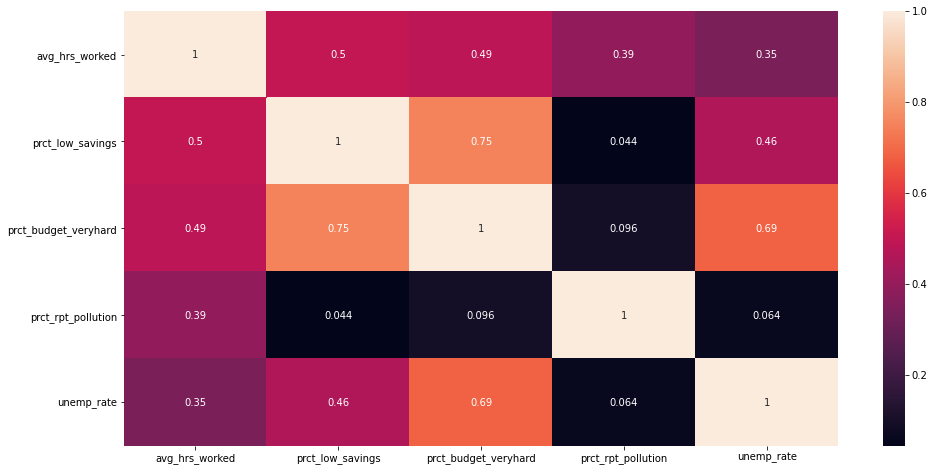

In [7]:
#A heatmap for the 5 features which best correlate with the feature
def n_feature_heatmap(df, feature, n=5):
    crmat = df.corr()
    cols = crmat.nlargest(5, feature).index
    sns.heatmap(crmat.loc[cols,cols],annot=True,fmt=".2g",annot_kws=None);
n_feature_heatmap(df, "avg_hrs_worked")

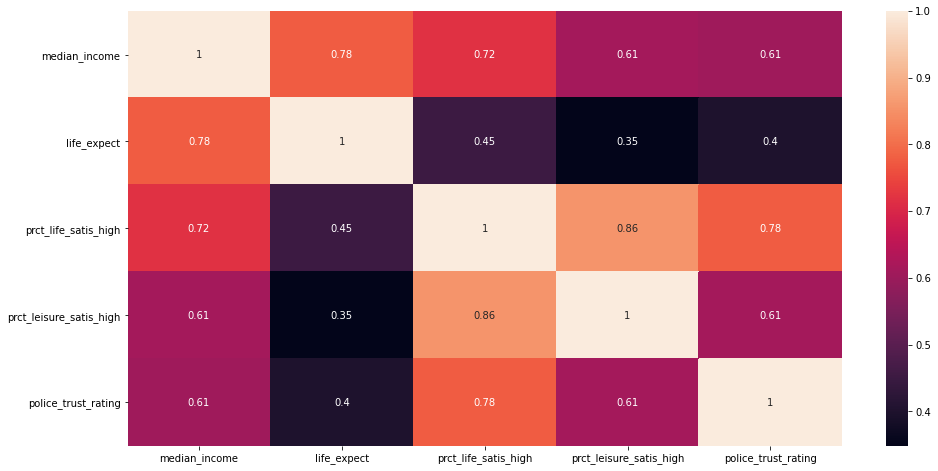

In [8]:
n_feature_heatmap(df,"median_income")

We see that median income is very strongly correlated with life expectancy and high life satisfaction percentage in Europe.

Geographical maps: https://plot.ly/python/choropleth-maps/

In [9]:
#Add the country codes to the dataframe to visualize as a map
df_code = pd.read_csv("/Users/onur/Desktop/projects/nlp_data/europe-data/data/country_gdp_code.csv")
df["code"] = ""
df.country = df.country.replace("Czechia","Czech Republic") #Make the country name the same in both files

country_d = {}
for c,v  in enumerate(df_code.COUNTRY.tolist()):
    country_d[v] = c

country_dict = {}
for c,v  in enumerate(df.country.tolist()):
    country_dict[v] = c

for x in range(country_num):
    val = df_code.loc[df_code.COUNTRY==df.at[x,"country"], "CODE"]
    df.at[x,"code"] = val.iloc[0]

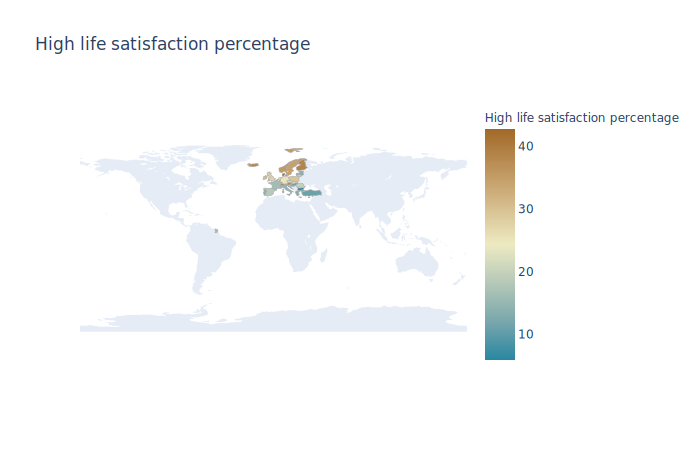

In [10]:
import plotly.graph_objects as go
df_code = pd.read_csv("/Users/onur/Desktop/projects/nlp_data/europe-data/data/country_gdp_code.csv")

def map_display(df, feature, scope, colorbar_title):
    """
    Creates a plotly map to visualize geographical data.
    """
    fig = go.Figure(data=go.Choropleth(
        locations = df['code'],
        z = df[feature],
        text = country_list,
        colorscale = 'Earth',
        autocolorscale=False,
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = colorbar_title,
    ))

    fig.update_layout(
        title_text=colorbar_title,
        geo=dict(
            scope=scope,
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
    )
    fig.show()
    
    
map_display(df, "prct_life_satis_high", "world", "High life satisfaction percentage")

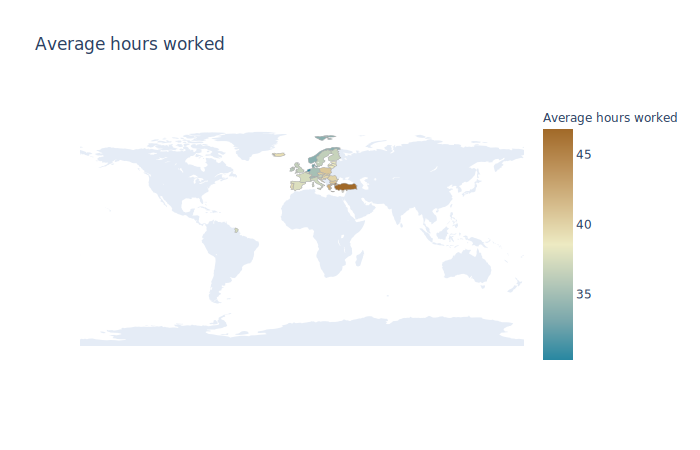

In [11]:
map_display(df, "avg_hrs_worked", "world", "Average hours worked")

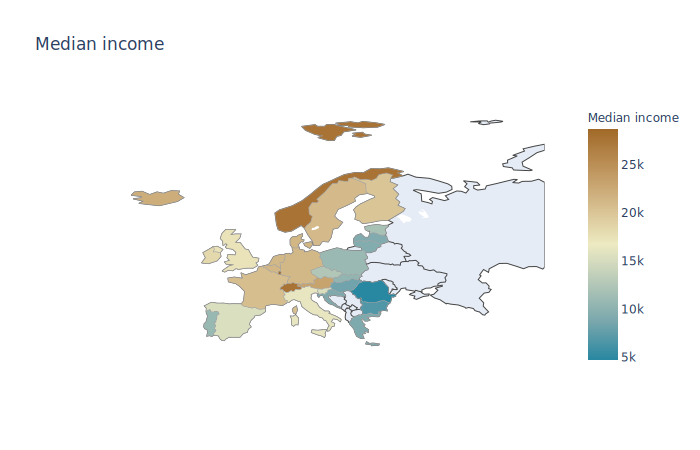

In [12]:
map_display(df, "median_income", "europe", "Median income")

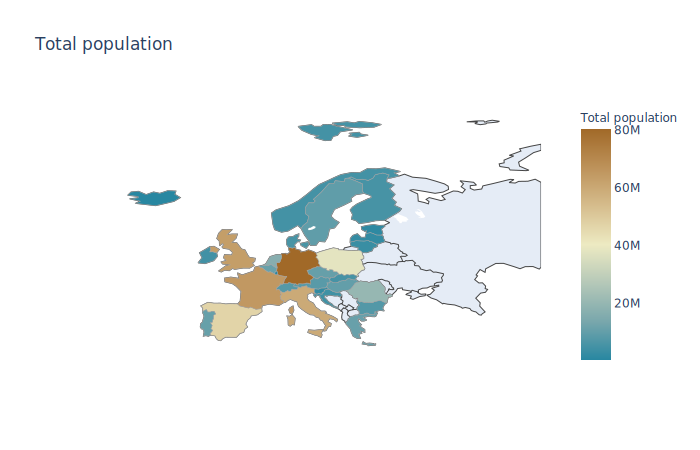

In [13]:
map_display(df, "total_pop", "europe", "Total population")

United Nations geoscheme for Europe lists ("for statistical convenience and does not imply any assumption regarding political or other affiliation of countries or territories") Eastern European countries as Belarus, Bulgaria, Czech Republic, Hungary, Moldova, Poland, Romania, Russia, Slovakia, Ukraine; Western European countries as Austria, Belgium, France, Germany, Liechtenstein, Luxembourg, Monaco, Netherlands, Switzerland. (https://unstats.un.org/unsd/methodology/m49/) I will include the UK, Ireland, and Iceland in the West; and Turkey, Greece, Croatia, Lithuania in the East. 

In [14]:
df_region = pd.Series("")
east_europe = "Belarus, Bulgaria, Czech Republic, Czechia, Hungary, Moldova, Poland, Romania, Russia, Slovakia, Ukraine, Turkey, Greece, Croatia, Lithuania"
west_europe = "Austria, Belgium, France, Germany, Liechtenstein, Luxembourg, Monaco, Netherlands, Switzerland, United Kingdom, Iceland, Ireland"

count=0
for country in country_list:
    if country in east_europe:
        df_region[count] = "East"
        count+=1
    elif country in west_europe:
        df_region[count] = "West"
        count+=1
    else:
        df_region[count] = "Other"
        count+=1
        
df["region"] = df_region

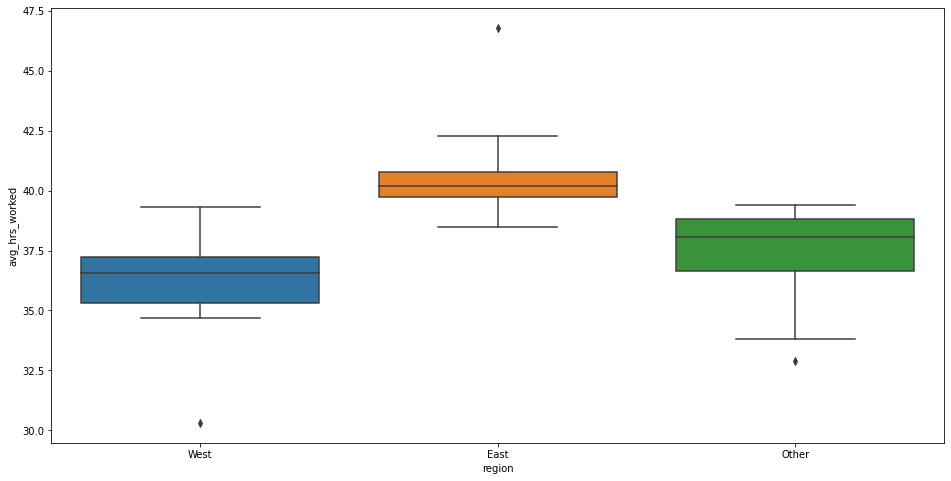

In [15]:
sns.boxplot(x='region', y="avg_hrs_worked", data=df);

Boxplots are useful to analyze the relationship between a categorical (in this case, region) and a continuous variable. Five number summary of a dataset is visualized with markers for the minimum, the maximum, the median and the first and third quartiles. In the graph above, I notice an outlier (a data point that is 3xIQR above the third quartile or 3xIQR below the first quartile) for the East. This is due to my inclusion of Turkey in the list of eastern european countries. It is also visible in the geographical map above that average of the working hours in Turkey is noticeably higher than European countries with 46.8 hours. For the West, I see from the geographical map that the outlier at the bottom is Netherlands with the average working hours of 30.3.

With the median roughly in the middle of the box, the values for the East is symmetric and the median is close to 40 hours of work. There is not a great difference in the variability of data between the West and East but the maximum working hours for the West corresponds roughly to the first quartile of the East.

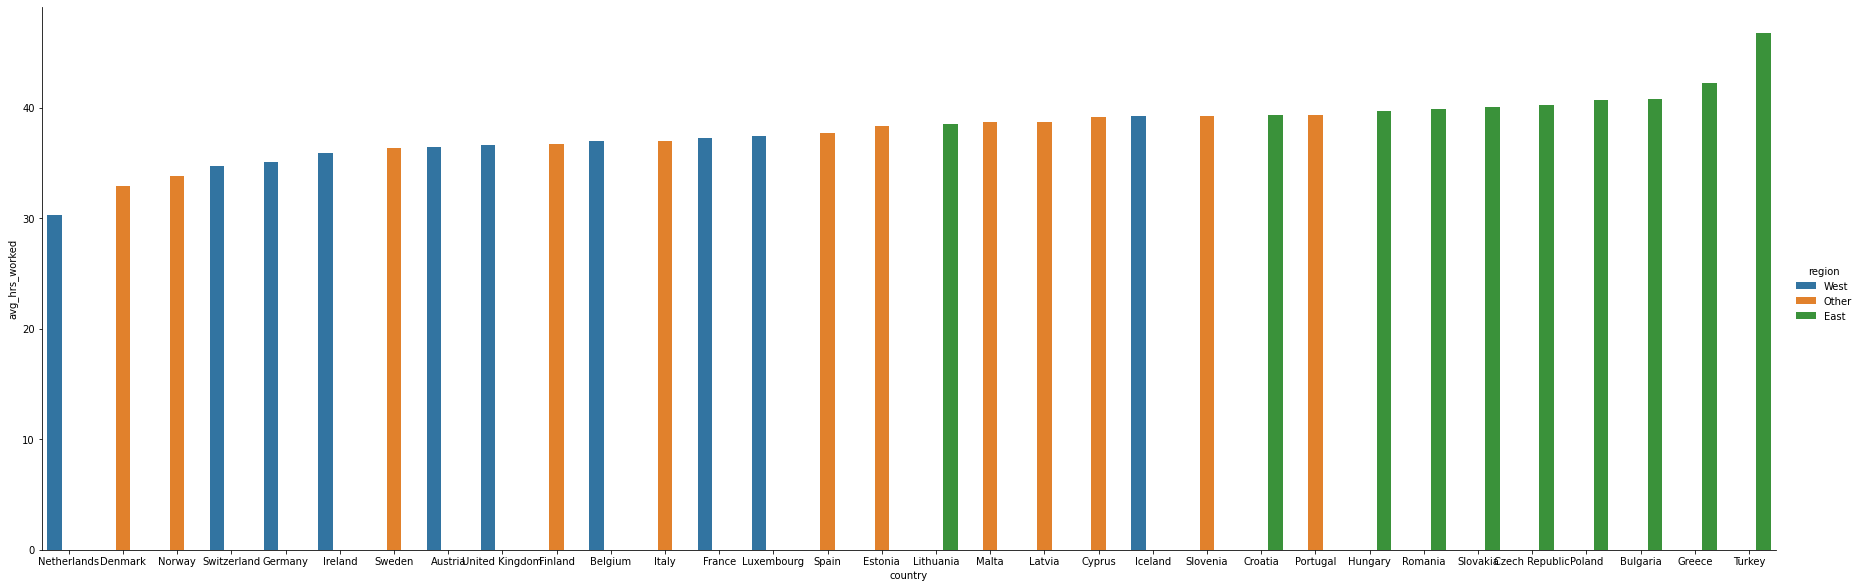

In [16]:
df_sorted = df.sort_values("avg_hrs_worked", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
sns.catplot(x="country", y="avg_hrs_worked", hue="region", kind="bar", height=8.27, aspect=25/8.27,
                data=df_sorted);

Bar charts are useful to visualize nominal variables (in our case, country). Unlike the boxplot above, the bars allow us to compare individual countries by the average hours worked. The dataset is ordered and coloured by "region". The countries of the category "other" consists of Southern and Nothern European countries (based on UN geoscheme for Europe) and we can observe northern countries generally having lower average hours of work.

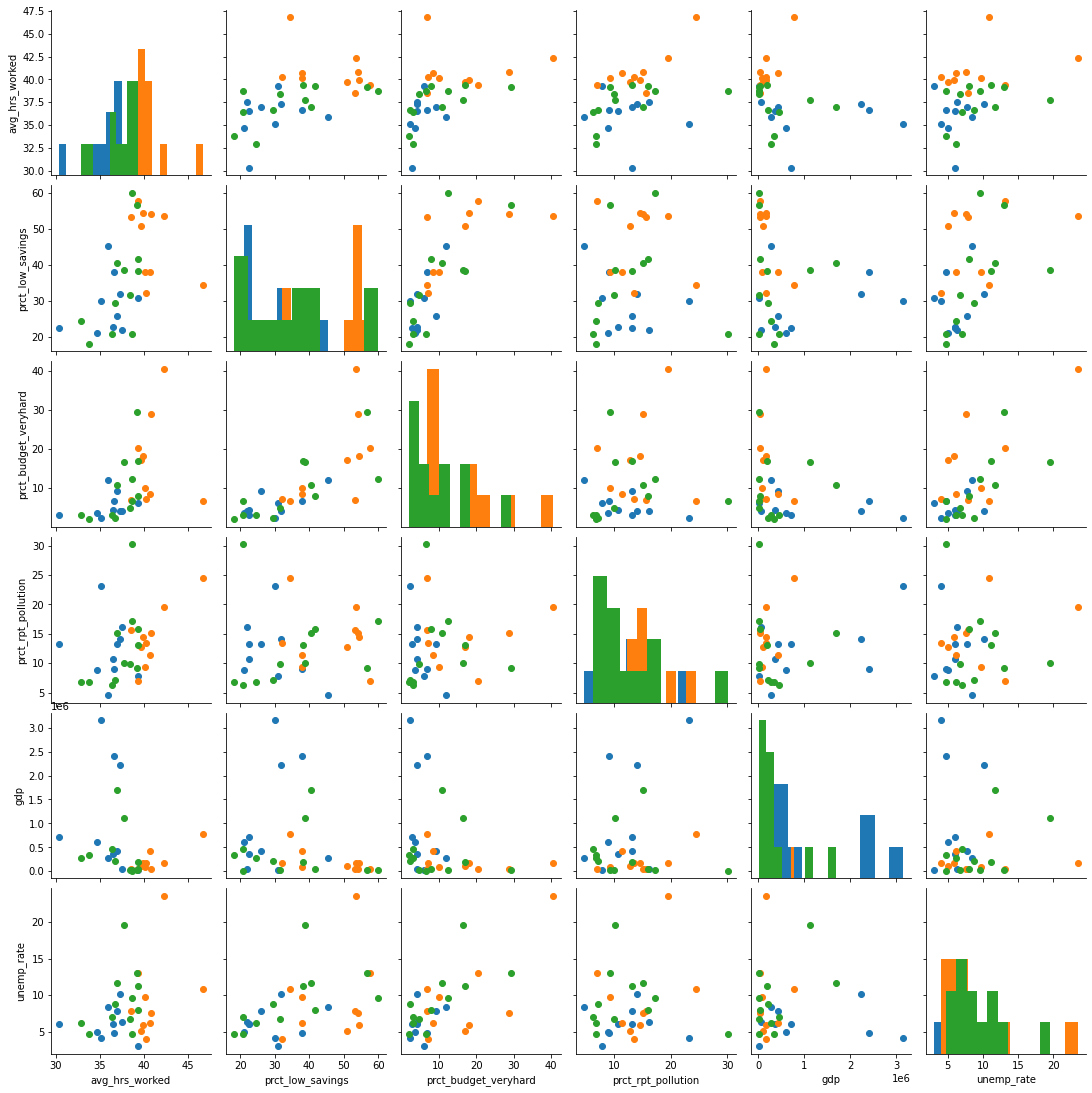

In [17]:
columns = ["avg_hrs_worked", "prct_low_savings", "prct_budget_veryhard", "prct_rpt_pollution", "gdp", "unemp_rate", "region"]
df_pair = df[columns]

g = sns.PairGrid(df_pair, hue="region")
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

The above visualization of pairwise data relationships are for the 5 features that correlate most with avg_hrs_worked, along with gdp. The explanations for the feature names are as below:

prct_budget_veryhard: percentage of very hard budget (make ends meet)
prct_low_savings: percentage of low savings
unemp_rate: rate of unemployment
prct_rpt_pollution: percentage of reported pollution.
(https://www.kaggle.com/roshansharma/europe-datasets)

For the scatterplots of the features avg_hrs_worked and prct_low_savings; avg_hrs_worked and prct_budget_veryhard; avg_hrs_worked and prct_rpt_pollution, I observe a positive association. The association is stronger for avg_hrs_worked and prct_low_savings but generally they are weak or moderately strong. It is possible to observe other positive, linear, moderately strong associations such as prct_budget_veryhard and prct_low_savings. It is possible to say that mostly the Eastern European countries are clustered on the right hand side and the West on the left hand side of the graphs.

### Bubble Charts
Bubble charts are scatterplots but a third dimension is added with the size of the dots. In the immediate buuble chart below, the size of the dots represent the gdp values of the countries and the chart is a scatterplot of average hours worked and percentage of low savings.


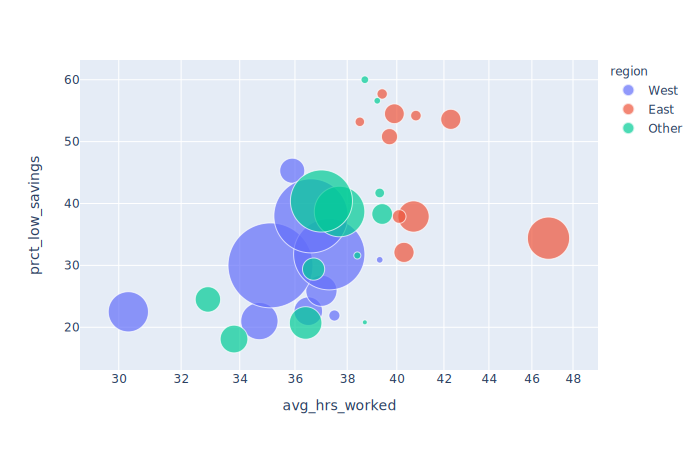

In [18]:
#https://plot.ly/python/bubble-charts/
import plotly.express as px

fig = px.scatter(df, x="avg_hrs_worked", y="prct_low_savings", 
                 size="gdp", color="region",
                 hover_name="country", log_x=True, size_max=60)
fig.show()